# The Thai Yelp Mythbuster and Food Recommender - Part 1

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Loading and EDA - Overview Data-Set (restaurants)

In [2]:
#Loading data-set of top restaurants with the reviews as a single string(overview yelp-data set; from BeautifulSoup)
df=pd.read_csv("./yelp_sfo_thai.csv")

In [3]:
df.head(3)

,Name,review_count,rating,price,category
0,Osha Thai,2208,3.5,$$,Thai
1,Lers Ros,2073,4.0,$$,Thai
2,King Of Thai Noodle House,1717,3.5,$$,Thai


In [4]:
df.isnull().sum()

Name            0
review_count    0
rating          0
price           0
category        0
dtype: int64

Text(0.5,1,'Distribution of Rating')

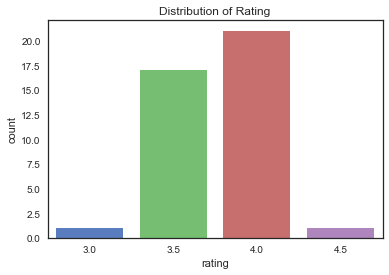

In [5]:
# Analysing distribution of Thai restaurant rating in SF
rating=df["rating"]
sns.set(style="white",palette="muted",color_codes=True)
ax=sns.countplot(rating)
ax.set_title("Distribution of Rating")

C:\Users\dabhi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\dabhi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


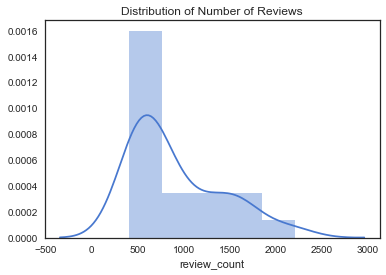

In [6]:
# Analysing distribution of number of reviews per Thai restaurant in SF
reviews=df["review_count"]
sns.set(style="white",palette="muted",color_codes=True)
ax=sns.distplot(reviews)
ax.set_title("Distribution of Number of Reviews");

Text(0.5,1,'Distribution of price')

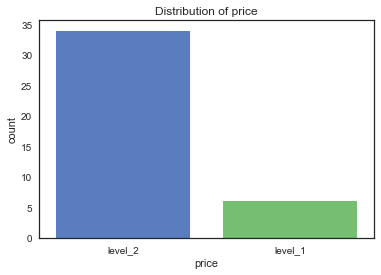

In [7]:
# Looking at the distribution of Thai price range in SF
price_map={"$":"level_1","$$":"level_2","$$$":"level_3","$$$$":"level_4"}
price=df.price.map(price_map)
sns.set(style="white",palette="muted",color_codes=True)
ax=sns.countplot(price)
ax.set_title("Distribution of price")

In [8]:
df=df.rename(columns={'Name':'name'})
df.dtypes

name             object
review_count      int64
rating          float64
price            object
category         object
dtype: object

In [9]:
# Loading the reviews data set from Beautiful Soup
df2 = pd.read_csv('./yelp_sfo_thai_reviews_again.csv')

In [10]:
df2 = pd.DataFrame(data=df2, columns=['name','reviews'])

In [11]:
df2.head(3)

,name,reviews
0,Osha Thai,"The food was pretty good, the environment nice..."
1,Lers Ros,Delicious! I highly highly recommend the:-Quai...
2,King Of Thai Noodle House,Look. It's SF and you're in Union Square. Yo...


In [12]:
# Merging both the data sets
df=df.merge(df2,on='name',how='left')

In [13]:
# importing sentiment analysis packages from NLTK
# Vader SentimentAnalyzer was used to obtain the polarity scores for the reviews of restaurants. 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
sid = SentimentIntensityAnalyzer()

C:\Users\dabhi\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [14]:
# Analysing 'reviews'
df['reviews']

0     The food was pretty good, the environment nice...
1     A coworker and I stopped at Osha Thai on a lun...
2     Delicious! I highly highly recommend the:-Quai...
3     Look.  It's SF and you're in Union Square.  Yo...
4     I went here with my best friend for dinner. We...
5     This place was good but not amazing.Papaya sal...
6     Excellent food, unique menu, very expensive fo...
7     Recently returned to this SF Thai restaurant, ...
8     I went here with my best friend for dinner. We...
9     This place was good but not amazing.Papaya sal...
10    Incredibly fun atmosphere for any occasion, be...
11    This is one of the best Thai restaurants I hav...
12    This restaurant is simply amazing!!! From the ...
13    True rating: 4.5Here's the breakdown:1. The ne...
14    A bit of a hole-in-the-wall -- in a good way!S...
15    Pretty good! Got the combo beef stew. The only...
16    I couldnt even tell what kind of food they hav...
17    Only had take out (ordered ahead on Yelp) 

In [15]:
#Appending Sentiments Scores to the restaurants
sentiments = []
sid = SentimentIntensityAnalyzer()
for i in range(df.shape[0]):
        line = df['reviews'].iloc[i]
        sentiment = sid.polarity_scores(line)
        sentiments.append([sentiment['neg'], sentiment['pos'],
                           sentiment['neu'], sentiment['compound']])
df[['neg', 'pos', 'neu', 'compound']] = pd.DataFrame(sentiments)
#df['Negative'] = df['compound'] < -0.1
#df['Positive'] = df['compound'] > 0.1

In [16]:
df.tail(3)

,name,review_count,rating,price,category,reviews,neg,pos,neu,compound
43,Sweet Lime Thai Cuisine,427,4.0,$$,Thai,We came here before a movie at AMC Kabuki on a...,0.035,0.200,0.765,0.9999
44,Vanida Thai Kitchen,422,3.5,$$,Thai,We just saw this spot accidentally on our way ...,0.056,0.174,0.771,0.9997
45,Amphawa,407,4.0,$$,Thai,This review is mostly for their ROTI WITH ICE ...,0.067,0.189,0.745,0.9998


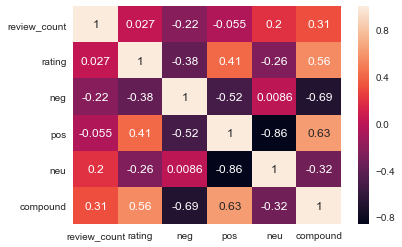

In [17]:
sns.heatmap(df.corr(),annot=True)

#### The rating is positively correlated with the positive sentiment and negatively correlated with the negative sentiment. The Thai restaurant  can reasonably represent the perception of a restaurant as is expressed in the reviews. However, the correlation between review count and rating is inconclusive.